In [1]:
import os
import json
import requests
from typing import  List, Any, Literal
from IPython.display import display, Markdown, Image

from langchain_core.messages import HumanMessage,ToolMessage, SystemMessage
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_groq import ChatGroq

from langgraph.graph import StateGraph
from typing_extensions import TypedDict

In [2]:
# ===== API Configuration =====
# ຕັ້ງຄ່າ API Keys
GROQ_API_KEY = os.getenv("GROQ_API_KEY")  # ໃສ່ Groq API key
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")  # ໃສ່ Tavily API key  
WEATHER_API_KEY = os.getenv("WEATHER_API_KEY")  # ໃສ່ Weather API key (OpenWeatherMap)

# ຕັ້ງຄ່າ environment variables
os.environ["GROQ_API_KEY"] = GROQ_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY

In [3]:
# ===== Tools Definition =====
@tool
def get_weather(city: str) -> str:
    """ເອົາຂໍ້ມູນສະພາບອາກາດຂອງເມືອງທີ່ກຳນົດ"""
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        "q": city,
        "appid": WEATHER_API_KEY,
        "units": "metric",
        "lang": "en"
    }
    
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()
        
        weather_info = {
            "city": data["name"],
            "country": data["sys"]["country"],
            "temperature": data["main"]["temp"],
            "feels_like": data["main"]["feels_like"],
            "humidity": data["main"]["humidity"],
            "description": data["weather"][0]["description"],
            "wind_speed": data["wind"]["speed"]
        }
        
        return json.dumps(weather_info, ensure_ascii=False)
    except Exception as e:
        return f"ບໍ່ສາມາດເອົາຂໍ້ມູນສະພາບອາກາດໄດ້: {str(e)}"

# Tavily search tool
search_tool = TavilySearchResults(max_results=3)


C:\Users\Dell\AppData\Local\Temp\ipykernel_56432\239723253.py:33: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  search_tool = TavilySearchResults(max_results=3)


In [4]:
# ===== LLM Setup =====
llm = ChatGroq(
    model="meta-llama/llama-4-maverick-17b-128e-instruct",
    temperature=0,
    max_tokens=1024
)

🚀 ເລີ່ມຕົ້ນ Multi-Agent System...

📊 ສະແດງ Multi-Agent System Graph:


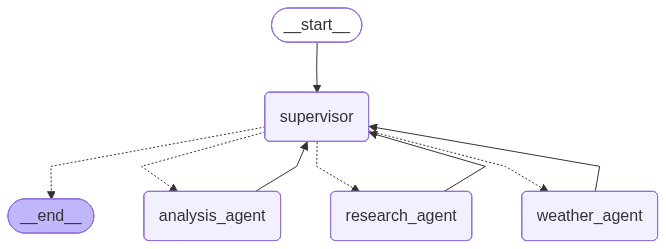


🌤️ ທົດສອບ Weather Agent
🤖 Multi-Agent System ກຳລັງປະມວນຜົນ: ສະພາບອາກາດໃນນະຄອນຫລວງວຽງຈັນເປັນແນວໃດຕອນນີ້?



## ຄຳຕອບຈາກ Multi-Agent System

ຕອນນີ້ສະພາບອາກາດໃນນະຄອນຫລວງວຽງຈັນ ມີອຸນຫະພູມ 27 ອົງສາເຊ, ຄວາມຊື່ນພີ່ນ 85%, ມີເມກເຂັ້ມຂົ້ນ ເຮັດໃຫ້ຮູ້ສຶກຮ້ອນອຶດອັດ ຄວນແຕ່ງຕົວດ້ວຍເສື້ອຜ້າທີ່ບາງ ແລະ ໃສ່ເສື້ອກັນແດດ ເພື່ອປ້ອງກັນແສງແດດ. ຄວນຫຼີກລ່ຽງກິດຈະກຳກາງແຈ້ງໃນຊ່ວງທີ່ມີແດດແຮງ.


🔍 ທົດສອບ Research Agent
🤖 Multi-Agent System ກຳລັງປະມວນຜົນ: ເກມ PS5 ເດືອນ 9 ມີເກມຍັງອອກມາໃຫມ່



## ຄຳຕອບຈາກ Multi-Agent System

ເກມ PS5 ເດືອນ 9 ທີ່ກຳລັງຈະມາໃຫມ່ລວມມີຫຼາຍເກມທີ່ໜ້າຕື່ນເຕັ້ນ ໂດຍສະເພາະແມ່ນລາຍຊື່ເກມທີ່ວາງຈະຈ່ອຍໃນລາຍການຕໍ່ໄປນີ້:

1. **Hell Is Us** - ວັນທີ 4 ກັນຍາ 2025 (PS5, XSX|S, PC)
2. **Indiana Jones and the Great Circle DLC** - ວັນທີ 4 ກັນຍາ 2025 (PS5, XSX|S, PC)
3. **Everybody's Golf Hot Shots** - ວັນທີ 5 ກັນຍາ 2025 (PS5, Switch2, PC)
4. **Baby Steps** - ວັນທີ 8 ກັນຍາ 2025 (PS5, PC)
5. **Dying Light The Beast** - ວັນທີ 19 ກັນຍາ 2025
6. **Borderlands 4** - ວັນທີ 23 ກັນຍາ 2025 (PS5, XSX|S, PC)
7. **Silent Hill F** - ວັນທີ 25 ກັນຍາ 2025 (PS5, XSX|S, PC)
8. **Sonic Racing Crossworlds** - ວັນທີ 25 ກັນຍາ 2025 (PS5, XSX|S, PC)
9. **Daemon X Machina: Titanic Scion** - ວັນທີ 3 ກັນຍາ 2025 (PS5)

ເກມເຫຼົ່ານີ້ລ້ວນມີຄວາມໜ້າສົນໃຈ ແລະ ຖືກຄາດຫວັງວ່າຈະເປັນທີ່ນິຍົມໃນຫມູ່ຜູ້ຫຼິ້ນເກມໃນຊ່ວງເດືອນ 9 ນີ້. ນອກຈາກນີ້, ຍັງມີເກມອື່ນໆ ທີ່ວາງຈະຈ່ອຍໃນຊ່ວງເດືອນ 9 ທີ່ຍັງຄົງເປັນທີ່ຕື່ນເຕັ້ນໃນວົງການຫຼິ້ນເກມ.


📈 ທົດສອບ Analysis Agent
🤖 Multi-Agent System ກຳລັງປະມວນຜົນ: ວິເຄາະຄວາມແຕກຕ່າງລະຫວ່າງ AI models ໃນປີ 2025



## ຄຳຕອບຈາກ Multi-Agent System

ໃນປີ 2025, AI models ຈະສືບຕໍ່ພັດທະນາແລະກາຍເປັນສັບສົນຫຼາຍຂຶ້ນ. ດັ່ງນັ້ນ, ຄວາມແຕກຕ່າງລະຫວ່າງ AI models ຈະເຫັນໄດ້ຊັດເຈນຫຼາຍຂຶ້ນ. ໃນທີ່ນີ້ແມ່ນການວິເຄາະຄວາມແຕກຕ່າງລະຫວ່າງ AI models ໃນປີ 2025:

1. **ຄວາມສາມາດໃນການຮຽນຮູ້**: AI models ໃນປີ 2025 ຈະມີຄວາມສາມາດໃນການຮຽນຮູ້ທີ່ແຕກຕ່າງກັນ. ບາງ models ຈະມີຄວາມສາມາດໃນການຮຽນຮູ້ດ້ວຍຕົນເອງ (Self-supervised learning) ແລະສາມາດປັບຕົວເຂົ້າກັບສະພາບແວດລ້ອມໃຫມ່ໄດ້ໄວຂຶ້ນ. ໃນຂະນະທີ່ບາງ models ຈະຕ້ອງອາໄສການຮຽນຮູ້ແບບມີການຄວບຄຸມ (Supervised learning) ແລະອາໄສຂໍ້ມູນທີ່ຖືກຕ້ອງເພື່ອຮຽນຮູ້.

2. **ຄວາມສາມາດໃນການປະມວນຜົນ**: AI models ໃນປີ 2025 ຈະມີຄວາມສາມາດໃນການປະມວນຜົນຂໍ້ມູນທີ່ແຕກຕ່າງກັນ. ບາງ models ຈະສາມາດປະມວນຜົນຂໍ້ມູນທີ່ມີຂະຫນາດໃຫຍ່ແລະມີຄວາມສັບສົນໄດ້ໄວຂຶ້ນ. ໃນຂະນະທີ່ບາງ models ຈະຖືກຈໍາກັດໃນການປະມວນຜົນຂໍ້ມູນທີ່ມີຂະຫນາດນ້ອຍແລະມີຄວາມສັບສົນໜ້ອຍ.

3. **ຄວາມສາມາດໃນການຕັດສິນໃຈ**: AI models ໃນປີ 2025 ຈະມີຄວາມສາມາດໃນການຕັດສິນໃຈທີ່ແຕກຕ່າງກັນ. ບາງ models ຈະສາມາດຕັດສິນໃຈໄດ້ດ້ວຍຕົນເອງໂດຍອາໄສຂໍ້ມູນທີ່ມີຢູ່. ໃນຂະນະທີ່ບາງ models ຈະຕ້ອງອາໄສການປ້ອນຂໍ້ມູນຈາກຜູ້ໃຊ້ເພື່ອຕັດສິນໃຈ.

4. **ຄວາມສາມາດໃນການອະທິບາຍ**: AI models ໃນປີ 2025 ຈະມີຄວາມສາມາດໃນການອະທິບາຍຜົນການຕັດສິນໃຈຫຼືຜົນການຄາດຄະເນທີ່ແຕກຕ່າງກັນ. ບາງ models ຈະສາມາດອະທິບາຍເຫດຜົນທີ່ຢູ່ເບື້ອງຫຼັງຜົນການຕັດສິນໃຈຫຼືຜົນການຄາດຄະເນໄດ້. ໃນຂະນະທີ່ບາງ models ຈະບໍ່ສາມາດອະທິບາຍເຫດຜົນໄດ້.

5. **ຄວາມສາມາດໃນການຮັບມືກັບຄວາມບໍ່ແນ່ນອນ**: AI models ໃນປີ 2025 ຈະມີຄວາມສາມາດໃນການຮັບມືກັບຄວາມບໍ່ແນ່ນອນທີ່ແຕກຕ່າງກັນ. ບາງ models ຈະສາມາດຮັບມືກັບຄວາມບໍ່ແນ່ນອນແລະປັບຕົວເຂົ້າກັບສະພາບແວດລ້ອມທີ່ມີຄວາມບໍ່ແນ່ນອນໄດ້. ໃນຂະນະທີ່ບາງ models ຈະບໍ່ສາມາດຮັບມືກັບຄວາມບໍ່ແນ່ນອນໄດ້ດີ.

ສະຫຼຸບແລ້ວ, AI models ໃນປີ 2025 ຈະມີຄວາມແຕກຕ່າງກັນໃນຫຼາຍດ້ານເຊັ່ນ: ຄວາມສາມາດໃນການຮຽນຮູ້, ຄວາມສາມາດໃນການປະມວນຜົນ, ຄວາມສາມາດໃນການຕັດສິນໃຈ, ຄວາມສາມາດໃນການອະທິບາຍ, ແລະຄວາມສາມາດໃນການຮັບມືກັບຄວາມບໍ່ແນ່ນອນ. ດັ່ງນັ້ນ, ການເລືອກ AI model ທີ່ເຫມາະສົມກັບຄວາມຕ້ອງການຂອງທ່ານແມ່ນສໍາຄັນ.


✅ ການທົດສອບ Multi-Agent System ສຳເລັດ!


In [5]:
# ===== State Definition =====
class MultiAgentState(TypedDict):
    messages: List[Any]
    next_worker: str
    task_complete: bool

# ===== Individual Agents =====
class WeatherAgent:
    """Agent ສະເພາະສຳລັບສະພາບອາກາດ"""
    
    def __init__(self):
        self.name = "weather_agent"
        self.tools = [get_weather]
        self.llm_with_tools = llm.bind_tools(self.tools)
    
    def execute(self, state: MultiAgentState):
        """set up agent ດ້ານສະພາບອາກາດ"""
        messages = state["messages"]
        
        system_prompt = """ເຈົ້າແມ່ນ Weather Expert Agent.
        
        ໜ້າທີ່ຂອງເຈົ້າແມ່ນ:
        - ວິເຄາະຄຳຖາມກ່ຽວກັບສະພາບອາກາດ
        - ໃຊ້ get_weather tool ເພື່ອເອົາຂໍ້ມູນ
        - ໃຫ້ຄຳແນະນຳກ່ຽວກັບສະພາບອາກາດ
        - ຕອບເປັນພາສາລາວ ແບບກະທັດຮັດ

        ຖ້າຄຳຖາມບໍ່ກ່ຽວກັບສະພາບອາກາດ, ໃຫ້ບອກວ່າຢູ່ນອກຂອບເຂດຂອງເຈົ້າ."""

        full_messages = [SystemMessage(content=system_prompt)] + messages
        
        # ເອີ້ນ LLM ດ້ວຍ tools
        response = self.llm_with_tools.invoke(full_messages)
        
        # ຖ້າມີ tool calls, ໃຫ້ປະຕິບັດ
        if hasattr(response, 'tool_calls') and response.tool_calls:
            messages_with_response = full_messages + [response]
            
            # Execute tools
            for tool_call in response.tool_calls:
                if tool_call["name"] == "get_weather":
                    result = get_weather.invoke(tool_call["args"])
                    messages_with_response.append(
                        ToolMessage(
                            content=str(result),
                            tool_call_id=tool_call["id"]
                        )
                    )
            
            # ເອີ້ນ LLM ອີກຄັ້ງ
            final_response = llm.invoke(messages_with_response + [
                SystemMessage(content="ຈົງອະທິບາຍຂໍ້ມູນສະພາບອາກາດຢ່າງລະອຽດ ລວມທັງຄຳແນະນຳການແຕ່ງຕົວແລະກິດຈະກຳທີ່ເໝາະສົມເປັນພາສາລາວ")
            ])
            
            return {"messages": [final_response], "task_complete": True}
        
        return {"messages": [response], "task_complete": True}

class ResearchAgent:
    """Agent ສຳລັບການຄົ້ນຄວ້າຂໍ້ມູນທົ່ວໄປ"""
    
    def __init__(self):
        self.name = "research_agent"
        self.tools = [search_tool]
        self.llm_with_tools = llm.bind_tools(self.tools)
    
    def execute(self, state: MultiAgentState):
        """ປະຕິບັດການຄົ້ນຄວ້າ"""
        messages = state["messages"]
        
        system_prompt = """ເຈົ້າແມ່ນ Research Expert Agent.

        ໜ້າທີ່ຂອງເຈົ້າແມ່ນ:
        - ຄົ້ນຫາຂໍ້ມູນທົ່ວໄປຈາກອິນເຕີເນັດ
        - ວິເຄາະຂໍ້ມູນ
        - ໃຫ້ຂໍ້ມູນທີ່ທັນສະໄໝແລະຖືກຕ້ອງ
        - ຕອບເປັນພາສາລາວແບບລະອຽດ

        ໃຊ້ tavily_search_results_json ເພື່ອຄົ້ນຫາຂໍ້ມູນ"""

        full_messages = [SystemMessage(content=system_prompt)] + messages
        
        response = self.llm_with_tools.invoke(full_messages)
        
        if hasattr(response, 'tool_calls') and response.tool_calls:
            messages_with_response = full_messages + [response]
            
            # Execute search tools
            for tool_call in response.tool_calls:
                if tool_call["name"] == "tavily_search_results_json":
                    result = search_tool.invoke(tool_call["args"])
                    messages_with_response.append(
                        ToolMessage(
                            content=str(result),
                            tool_call_id=tool_call["id"]
                        )
                    )
            
            # ວິເຄາະຜົນສຸດທ້າຍ
            final_response = llm.invoke(messages_with_response + [
                SystemMessage(content="ຈົງວິເຄາະຜົນການຄົ້ນຫາ ແລ້ວສ້າງຄຳຕອບທີ່ສົມບູນ ມີໂຄງສ້າງຊັດເຈນ ແລະໃຫ້ຄຳແນະນຳທີ່ເປັນປະໂຫຍດໃນພາສາລາວ")
            ])
            
            return {"messages": [final_response], "task_complete": True}
        
        return {"messages": [response], "task_complete": True}

class AnalysisAgent:
    """Agent ສຳລັບການວິເຄາະ"""
    
    def __init__(self):
        self.name = "analysis_agent"
    
    def execute(self, state: MultiAgentState):
        """set up agent ວິເຄາະມູນ"""
        messages = state["messages"]
        
        system_prompt = """ເຈົ້າແມ່ນ Analysis Expert Agent.

ໜ້າທີ່ຂອງເຈົ້າ:
- ວິເຄາະຂໍ້ມູນຈາກແຫຼ່ງຕ່າງໆ
- ຊອກຫາແບບແຜນແລະແນວໂນ້ມສຳຄັນ
- ວິເຄາະເປັນຂໍ້ສະຫຼຸບ
- ໃຫ້ຄຳແນະນຳແລະຂໍ້ສະເໜີທີ່ເປັນປະໂຫຍດ
- ຕອບເປັນພາສາລາວແບບມີເຫດມີຜົນ

ເຈົ້າຊ່ຽວຊານດ້ານການວິເຄາະແລະສາມາດເຊື່ອມໂຍງຂໍ້ມູນໄດ້ດີ"""

        full_messages = [SystemMessage(content=system_prompt)] + messages
        
        response = llm.invoke(full_messages)
        
        return {"messages": [response], "task_complete": True}

# ===== Supervisor Agent =====
class SupervisorAgent:
    """Agent ຄວບຄຸມແລະປະສານງານ"""
    
    def __init__(self):
        self.name = "supervisor"
        self.workers = ["weather_agent", "research_agent", "analysis_agent"]
    
    def route_task(self, state: MultiAgentState) -> str:
        """ຕັດສິນໃຈວ່າຄວນສົ່ງໜ້າວຽກໄປໃຫ້ agent ໃດ"""
        messages = state["messages"]
        last_message = messages[-1].content if messages else ""
        
        supervisor_prompt = f"""ເຈົ້າແມ່ນ Supervisor ທີ່ຄວບຄຸມ team ຂອງ expert agents.

ມີ workers 3 ຄົນ:
1. weather_agent - ຊ່ຽວຊານດ້ານສະພາບອາກາດ
2. research_agent - ຊ່ຽວຊານດ້ານການຄົ້ນຫາຂໍ້ມູນທົ່ວໄປ
3. analysis_agent - ຊ່ຽວຊານດ້ານການວິເຄາະ

ຄຳຖາມຂອງຜູ້ໃຊ້: "{last_message}"

ວິເຄາະຄຳຖາມແລະຕັດສິນໃຈວ່າຄວນສົ່ງໄປໃຫ້ worker ໃດ:
- ຖ້າກ່ຽວກັບສະພາບອາກາດ → weather_agent
- ຖ້າຕ້ອງການຄົ້ນຫາຂໍ້ມູນທົ່ວໄປ → research_agent  
- ຖ້າຕ້ອງການວິເຄາະ → analysis_agent
- ຖ້າເຮັດວຽກສຳເລັດແລ້ວ → FINISH

ຕອບພຽງແຕ່ຊື່ worker ເທົ່ານັ້ນ."""

        response = llm.invoke([SystemMessage(content=supervisor_prompt)])
        
        decision = response.content.strip().lower()
        
        if "weather_agent" in decision:
            return "weather_agent"
        elif "research_agent" in decision:
            return "research_agent" 
        elif "analysis_agent" in decision:
            return "analysis_agent"
        elif "finish" in decision:
            return "FINISH"
        else:
            # Default fallback
            if "weather" in last_message.lower() or "ອາກາດ" in last_message:
                return "weather_agent"
            else:
                return "research_agent"

# ===== Agent Instances =====
weather_agent = WeatherAgent()
research_agent = ResearchAgent()
analysis_agent = AnalysisAgent()
supervisor = SupervisorAgent()

# ===== Node Functions =====
def supervisor_node(state: MultiAgentState):
    """Supervisor node ຟັງຊັ້ນ"""
    next_worker = supervisor.route_task(state)
    return {"next_worker": next_worker}

def weather_node(state: MultiAgentState):
    """Weather agent node"""
    result = weather_agent.execute(state)
    return result

def research_node(state: MultiAgentState):
    """Research agent node"""
    result = research_agent.execute(state)
    return result

def analysis_node(state: MultiAgentState):
    """Analysis agent node"""
    result = analysis_agent.execute(state)
    return result

# ===== Router Function =====
def should_continue(state: MultiAgentState) -> Literal["weather_agent", "research_agent", "analysis_agent", "__end__"]:
    """ກຳນົດເສັ້ນທາງຕໍ່ໄປ"""
    if state.get("task_complete", False):
        return "__end__"
    
    next_worker = state.get("next_worker", "")
    
    if next_worker == "FINISH":
        return "__end__"
    elif next_worker in ["weather_agent", "research_agent", "analysis_agent"]:
        return next_worker
    else:
        return "__end__"

# ===== Multi-Agent Graph =====
def create_multi_agent_system():
    """ສ້າງ Multi-Agent System"""
    workflow = StateGraph(MultiAgentState)
    
    # ເພີ່ມ nodes
    workflow.add_node("supervisor", supervisor_node)
    workflow.add_node("weather_agent", weather_node)
    workflow.add_node("research_agent", research_node)
    workflow.add_node("analysis_agent", analysis_node)
    
    # ຕັ້ງ entry point
    workflow.set_entry_point("supervisor")
    
    # ເພີ່ມ conditional edges ຈາກ supervisor
    workflow.add_conditional_edges(
        "supervisor",
        should_continue,
        {
            "weather_agent": "weather_agent",
            "research_agent": "research_agent", 
            "analysis_agent": "analysis_agent",
            "__end__": "__end__"
        }
    )
    
    # ເພີ່ມ edges ຈາກ workers ກັບຄືນ supervisor
    workflow.add_edge("weather_agent", "supervisor")
    workflow.add_edge("research_agent", "supervisor")
    workflow.add_edge("analysis_agent", "supervisor")
    
    return workflow.compile()

# ===== Execution Function =====
def run_multi_agent(query: str):
    """ແລ່ນ Multi-Agent System"""
    agent_system = create_multi_agent_system()
    
    # ສ້າງ initial state
    initial_state = {
        "messages": [HumanMessage(content=query)],
        "next_worker": "",
        "task_complete": False
    }
    
    print(f"🤖 Multi-Agent System ກຳລັງປະມວນຜົນ: {query}\n")
    
    # ແລ່ນ agent system
    result = agent_system.invoke(initial_state)
    
    # ສະແດງຜົນໄຟນອນ
    final_response = result["messages"][-1].content
    
    # ສະແດງໃນຮູບແບບ Markdown
    display(Markdown(f"## ຄຳຕອບຈາກ Multi-Agent System\n\n{final_response}"))
    
    return result

# ===== Example Usage =====
if __name__ == "__main__":
    print("🚀 ເລີ່ມຕົ້ນ Multi-Agent System...")
    
    # ສ້າງ agent system ເພື່ອສະແດງ graph
    agent_system = create_multi_agent_system()
    
    # ສະແດງ Multi-Agent Graph ຄັ້ງດຽວ
    print("\n📊 ສະແດງ Multi-Agent System Graph:")
    try:
        display(Image(agent_system.get_graph().draw_mermaid_png()))
    except Exception as e:
        print(f"ບໍ່ສາມາດສະແດງ graph ໄດ້: {e}")
    
    #ຄຳຖາມທຳອິດ - ສະພາບອາກາດ (ຈະໄປຫາ Weather Agent)
    print("\n" + "="*60)
    print("🌤️ ທົດສອບ Weather Agent")
    print("="*60)
    result1 = run_multi_agent("ສະພາບອາກາດໃນນະຄອນຫລວງວຽງຈັນເປັນແນວໃດຕອນນີ້?")
    
    # ຄຳຖາມທີສອງ - ຄົ້ນຫາຂໍ້ມູນ (ຈະໄປຫາ Research Agent)
    print("\n" + "="*60)
    print("🔍 ທົດສອບ Research Agent")
    print("="*60)
    result2 = run_multi_agent("ເກມ PS5 ເດືອນ 9 ມີເກມຍັງອອກມາໃຫມ່")
    
    # ຄຳຖາມທີສາມ - ການວິເຄາະ (ຈະໄປຫາ Analysis Agent)
    print("\n" + "="*60)
    print("📈 ທົດສອບ Analysis Agent")
    print("="*60)
    result3 = run_multi_agent("ວິເຄາະຄວາມແຕກຕ່າງລະຫວ່າງ AI models ໃນປີ 2025")
    
    print("\n✅ ການທົດສອບ Multi-Agent System ສຳເລັດ!")